In [47]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_excel('Group1Dataset - Filtered by Final Predicators with Cluster Label.xlsx')


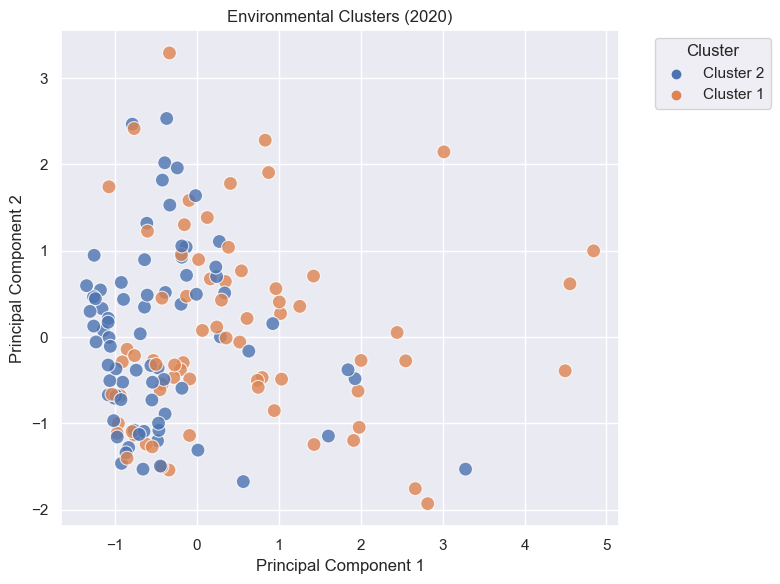

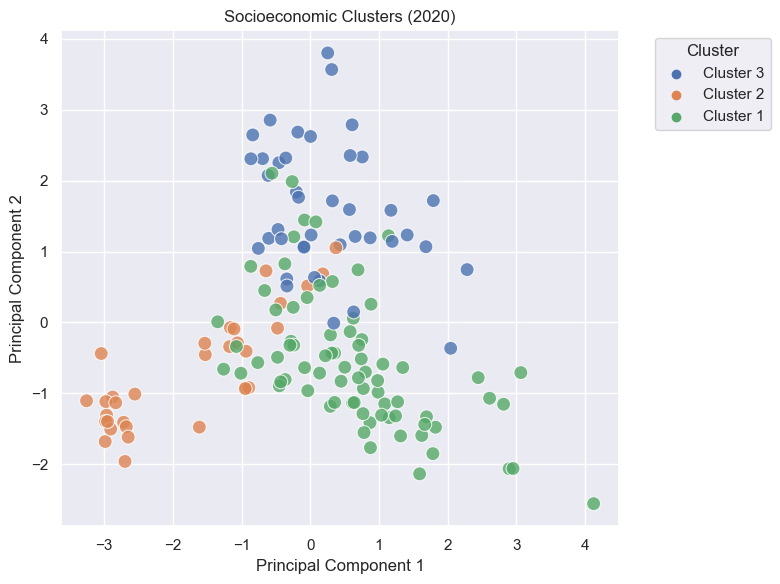

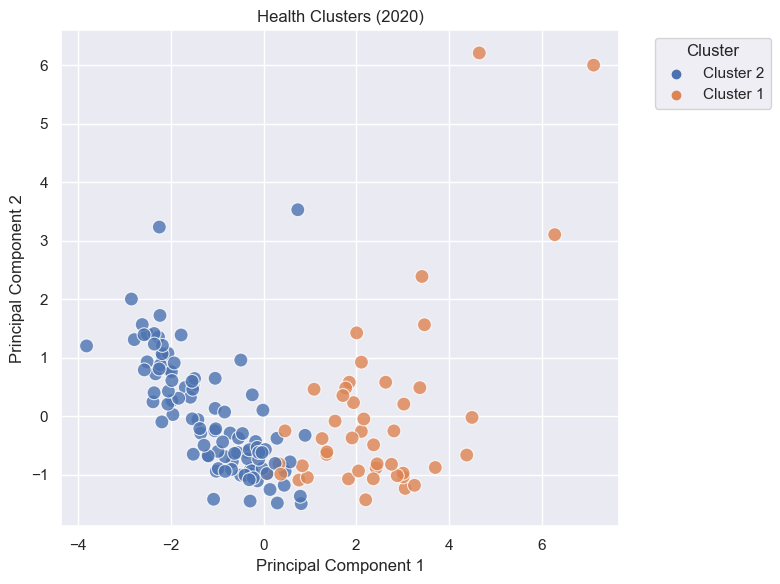

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# === Configurable Parameter ===
YEAR = 2020  # change this to plot a different year

# === Load Data ===
# — df must already be in memory with a 'Year' column and cluster labels like 'Cluster 1', etc.
# — mapping_df comes from your Excel that has ['Field Name','Category']
mapping_df = pd.read_excel('Cluster Variables.xlsx')
    
# === Filter for the selected year ===
df_year = df[df['Year'] == YEAR].copy()

# === Build indicator lists per category dynamically ===
health_cols = mapping_df.loc[mapping_df['Category']=='Health',       'Field Name'].tolist()
socio_cols  = mapping_df.loc[mapping_df['Category']=='Socio',        'Field Name'].tolist()
env_cols    = mapping_df.loc[mapping_df['Category']=='Environmental','Field Name'].tolist()

# Keep only columns that actually exist in df_year
health_cols = [c for c in health_cols if c in df_year.columns]
socio_cols  = [c for c in socio_cols  if c in df_year.columns]
env_cols    = [c for c in env_cols    if c in df_year.columns]

# === Seaborn Theme ===
sns.set_theme()

def plot_pca_2d(df_slice, feature_cols, cluster_col, title):
    """
    Performs PCA (2 components) on feature_cols, then plots PC1 vs PC2
    colored by cluster_col using Seaborn’s default palette.
    """
    sub = df_slice.dropna(subset=feature_cols + [cluster_col, 'CountryShortName'])
    X = sub[feature_cols]

    # Scale & PCA
    X_scaled = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2, random_state=42)
    comps = pca.fit_transform(X_scaled)

    # Prepare plotting DataFrame
    plot_df = pd.DataFrame({
        'PC1':     comps[:, 0],
        'PC2':     comps[:, 1],
        'Cluster': sub[cluster_col].astype(str),    # ensure discrete hue
        'Country': sub['CountryShortName']
    })

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=plot_df,
        x='PC1', y='PC2',
        hue='Cluster',          # default seaborn colors
        s=100,
        alpha=0.8
    )
    plt.title(f"{title} ({YEAR})")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# === Generate PCA plots ===
plot_pca_2d(df_year, env_cols,    'env_cluster',    'Environmental Clusters')
plot_pca_2d(df_year, socio_cols,  'socio_cluster',  'Socioeconomic Clusters')
plot_pca_2d(df_year, health_cols, 'health_cluster', 'Health Clusters')


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# === Configurable Param ===
YEAR = 2020
YEARS = [2005, 2010, 2015, 2020]
CLUSTER_COLS = [
    ('env_cluster',    'Environmental Clusters'),
    ('socio_cluster',  'Socioeconomic Clusters'),
    ('health_cluster', 'Health Clusters'),
]

# Load your mapping
mapping_df = pd.read_excel('Cluster Variables.xlsx')

# Seaborn defaults
sns.set_theme()

# Build indicator lists
df_year = df[df['Year']==YEAR].copy()
health_cols = mapping_df.query("Category=='Health'")['Field Name'].tolist()
socio_cols  = mapping_df.query("Category=='Socio'")['Field Name'].tolist()
env_cols    = mapping_df.query("Category=='Environmental'")['Field Name'].tolist()
health_cols = [c for c in health_cols if c in df_year]
socio_cols  = [c for c in socio_cols  if c in df_year]
env_cols    = [c for c in env_cols    if c in df_year]
FEATURE_MAP = {
    'env_cluster':    env_cols,
    'socio_cluster':  socio_cols,
    'health_cluster': health_cols,
}

def plot_pca_scatter(df, cluster_col, title, year):
    sub = df[df['Year']==year].dropna(subset=FEATURE_MAP[cluster_col] + [cluster_col])
    Xs  = StandardScaler().fit_transform(sub[FEATURE_MAP[cluster_col]])
    pcs = PCA(2, random_state=42).fit_transform(Xs)
    plot_df = pd.DataFrame({
        'PC1': pcs[:,0],
        'PC2': pcs[:,1],
        # convert to ordered ints
        'Cluster': pd.Categorical(sub[cluster_col].astype(int),
                                  categories=[1,2,3], ordered=True)
    })

    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=plot_df,
        x='PC1', y='PC2',
        hue='Cluster',
        hue_order=[1,2,3],  # ensure mapping order
        s=100,
        alpha=0.8
    )
    plt.title(f"{title} ({year})")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Cluster", bbox_to_anchor=(1.02,1), loc="upper left")
    plt.tight_layout()
    plt.show()


def plot_line_life(df, cluster_col, title):
    sub = df[df['Year'].isin(YEARS)].dropna(
        subset=[cluster_col, 'Life expectancy at birth, total (years)']
    )
    agg = (
        sub
        .groupby(['Year', cluster_col])['Life expectancy at birth, total (years)']
        .mean()
        .reset_index()
    )
    # same trick: categorical ints
    agg['Cluster'] = pd.Categorical(agg[cluster_col].astype(int),
                                    categories=[1,2,3], ordered=True)

    plt.figure(figsize=(8,5))
    sns.lineplot(
        data=agg,
        x='Year',
        y='Life expectancy at birth, total (years)',
        hue='Cluster',
        hue_order=[1,2,3],
        marker='o'
    )
    plt.title(f"Average Life Expectancy by {title}")
    plt.ylabel("Life expectancy at birth (years)")
    plt.tight_layout()
    plt.show()


# Draw everything
for col,title in CLUSTER_COLS:
    plot_pca_scatter(df, col, title, YEAR)

for col,title in CLUSTER_COLS:
    plot_line_life(df, col, title)


ValueError: invalid literal for int() with base 10: 'Cluster 2'